In [27]:
import numpy as np
import matplotlib.pyplot as plt
from discriminants_v2 import GaussianDiscriminant, MultivariateGaussian
from classifiers_v2 import DiscriminantClassifier

/var/folders/cl/c16hh87s1h53kvxy27ms7rjc0000gn/T/ipykernel_4310/3337700084.py:9: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  resting_heart_rates = np.random.multivariate_normal(mu_resting, sigma_resting, samples)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/colorbar.py:1229: RuntimeWarning: invalid value encountered in divide
  y = y / (self._boundaries[self._inside][-1] -


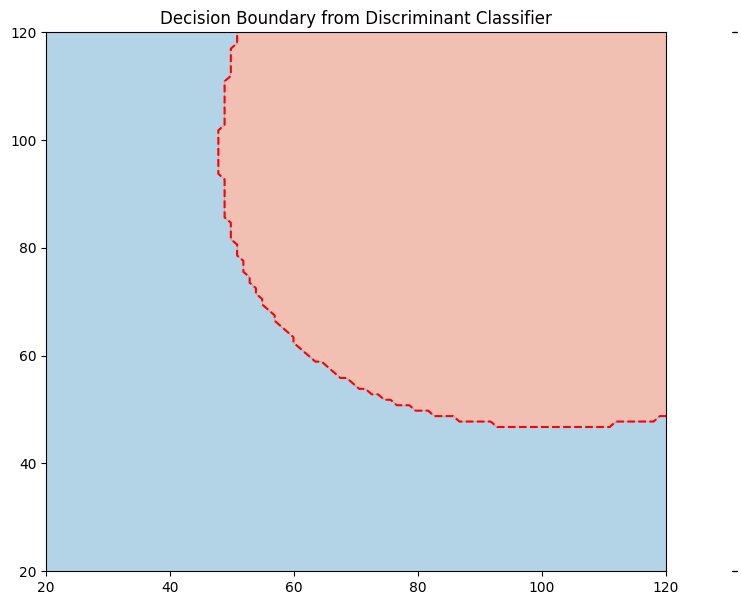

In [28]:
np.random.seed(90)

samples = 1000
mu_resting = [60, 10]
sigma_resting = [[20, 100], [100, 20]]
mu_stressed = [100, 80]
sigme_stressed = [[50, 20], [20, 50]]

resting_heart_rates = np.random.multivariate_normal(mu_resting, sigma_resting, samples)
stressed_heart_rates = np.random.multivariate_normal(mu_stressed, sigme_stressed, samples)

resting_discriminant = MultivariateGaussian(resting_heart_rates, name="Resting")
stressed_discriminant = MultivariateGaussian(stressed_heart_rates, name="Stressed")

classifier = DiscriminantClassifier()
classifier.set_classes(resting_discriminant, stressed_discriminant)

x_range = np.linspace(20, 120, 100)
y_range = np.linspace(20, 120, 100)
X, Y = np.meshgrid(x_range, y_range)
grid_points = np.stack([X, Y], axis=-1).reshape(-1, 2)

predictions = np.array([classifier.predict(point) for point in grid_points]).reshape(X.shape)

try:
    plt.figure(figsize=(10, 7))
    plt.contourf(X, Y, predictions == "Resting", cmap='RdBu', alpha=0.5, levels=np.linspace(0, 1, 3))
    plt.contour(X, Y, predictions == "Resting", colors='r', linestyles='--')

    plt.title('Decision Boundary from Discriminant Classifier')
    plt.colorbar()
    plt.show()
except IndexError:
    pass

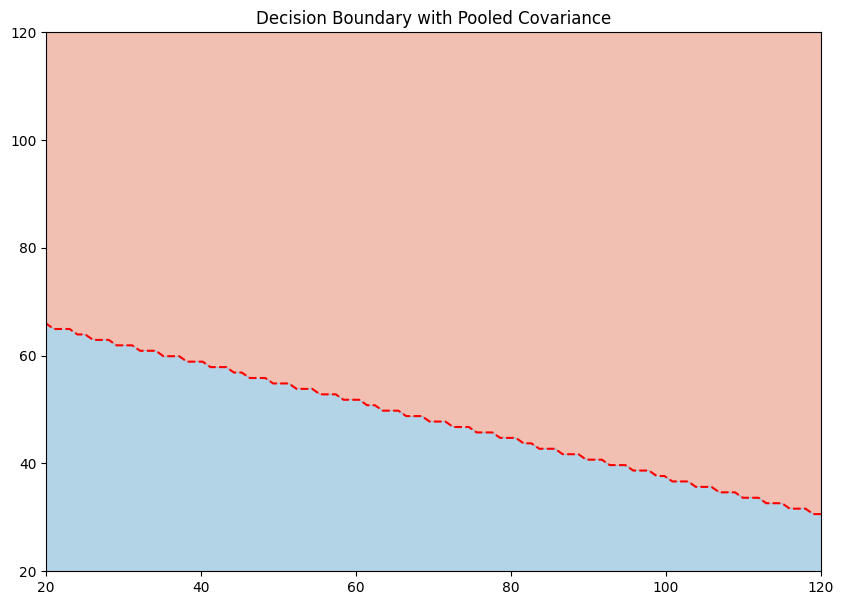

In [29]:
classifier = DiscriminantClassifier()
classifier.set_classes(resting_discriminant, stressed_discriminant)
classifier.pool_variances()

predictions_pooled = np.array([classifier.predict(point) for point in grid_points]).reshape(X.shape)

plt.figure(figsize=(10, 7))
plt.contourf(X, Y, predictions_pooled == "Resting", cmap='RdBu', alpha=0.5, levels=np.linspace(0, 1, 3))
plt.contour(X, Y, predictions_pooled == "Resting", colors='r', linestyles='--')

plt.title('Decision Boundary with Pooled Covariance')
plt.show()

Switching to a pooled covariance matrix changed the decision boundary from quadratic to linear. The boudary is defined by a line that seperates the classes based on means as opposed to individual covariance matricies of both classes. 

/var/folders/cl/c16hh87s1h53kvxy27ms7rjc0000gn/T/ipykernel_4310/2629987215.py:11: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  resting_heart_rates = np.random.multivariate_normal(mu_resting, sigma_resting, samples)


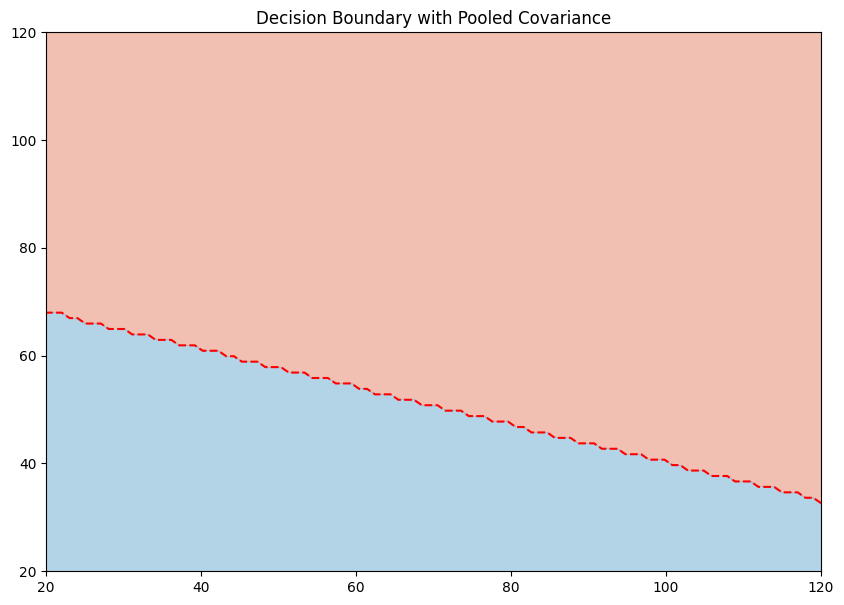

In [30]:
'''Changing the priors of the pooled covariance matrix'''

np.random.seed(90)

samples = 1000
mu_resting = [60, 10]
sigma_resting = [[20, 100], [100, 20]]
mu_stressed = [100, 80]
sigme_stressed = [[50, 20], [20, 50]]

resting_heart_rates = np.random.multivariate_normal(mu_resting, sigma_resting, samples)
stressed_heart_rates = np.random.multivariate_normal(mu_stressed, sigme_stressed, samples)

resting_discriminant = MultivariateGaussian(resting_heart_rates, name="Resting", prior=0.9)
stressed_discriminant = MultivariateGaussian(stressed_heart_rates, name="Stressed", prior=0.1)

classifier = DiscriminantClassifier()
classifier.set_classes(resting_discriminant, stressed_discriminant)
classifier.pool_variances()

predictions_pooled = np.array([classifier.predict(point) for point in grid_points]).reshape(X.shape)

plt.figure(figsize=(10, 7))
plt.contourf(X, Y, predictions_pooled == "Resting", cmap='RdBu', alpha=0.5, levels=np.linspace(0, 1, 3))
plt.contour(X, Y, predictions_pooled == "Resting", colors='r', linestyles='--')

plt.title('Decision Boundary with Pooled Covariance')
plt.show()

1. We assume the samples are independant and identically distributed to simplify the function that calculates the liklihood. Independence allows for the calculation of each probability to give us its exact liklihood because the outcomes don't rely on each other. Identical distribution means that all samples are are from the same probability distributiom which creates a consistent liklihood function.